In [23]:
def one_hot(x, k):
    one_hot_arr=np.zeros((k,1))
    one_hot_arr[x-1]=1
    return(one_hot_arr)
    pass

In [62]:
import numpy as np

def perceptron(data, labels, params={}, hook=None):
    # if T not in params, default to 100
    T = params.get('T', 100000)
    th=data[:,0]*labels[:,0]
    th0=labels[:,0]
   
    for t in range(T):
        flag=False
        for i in range(labels.shape[1]):
            if (labels[:,i]*(np.dot(np.transpose(data[:,i]),th)+th0))<=0:       
                th=th+data[:,i]*labels[:,i]
                th0=th0+labels[:,i]
                flag=True
        if flag==False:
            break
    return ([np.expand_dims(th,axis=1).astype(float), np.expand_dims(th0,axis=1).astype(float)])

In [27]:
data = np.array( [[1, 2, 3, 4, 5, 6]])
labels = np.array([[1, 1, -1, -1, 1, 1]])
print(perceptron(data,labels))

(7, [array([[[ 1.]],

       [[ 1.]],

       [[-2.]],

       [[-2.]],

       [[ 1.]],

       [[ 1.]]]), array([[ 0.]])])


In [ ]:
-200,-0.2,-1 0,0.6,0 -200,0.4,-1 0,1.2,0 
1.0            1.8        1.6         2.4
2.2
3.4
4.6                   


In [28]:
def super_simple_separable_through_origin():
    X = np.array([[2, 3, 9, 12],
                  [5, 1, 6, 5]])
    y = np.array([[1, -1, 1, -1]])
    return X, y

def super_simple_separable():
    X = np.array([[2, 3, 9, 12],
                  [5, 2, 6, 5]])
    y = np.array([[1, -1, 1, -1]])
    return X, y

def xor():
    X = np.array([[1, 2, 1, 2],
                  [1, 2, 2, 1]])
    y = np.array([[1, 1, -1, -1]])
    return X, y

def xor_more():
    X = np.array([[1, 2, 1, 2, 2, 4, 1, 3],
                  [1, 2, 2, 1, 3, 1, 3, 3]])
    y = np.array([[1, 1, -1, -1, 1, 1, -1, -1]])
    return X, y


In [30]:
def test_linear_classifier_with_features(dataFun, learner, feature_fun,
                             draw = True, refresh = True, pause = True):
    raw_data, labels = dataFun()
    data = feature_fun(raw_data) if feature_fun else raw_data
    if draw:
        ax = plot_data(raw_data, labels)
        def hook(params):
            (th, th0) = params
            plot_nonlin_sep(
                lambda x1,x2: int(positive(feature_fun(cv([x1, x2])), th, th0)),
                ax = ax)
            plot_data(raw_data, labels, ax)
            print('th', th.T, 'th0', th0)
            if pause: input('go?')
    else:
        hook = None
    th, th0 = learner(data, labels, hook = hook)
    if hook: hook((th, th0))
    print("Final score", int(score(data, labels, th, th0)))
    print("Params", np.transpose(th), th0)

def mul(seq):
    return functools.reduce(operator.mul, seq, 1)

def make_polynomial_feature_fun(order):
    # raw_features is d by n
    # return is D by n where D = sum_{i = 0}^order  multichoose(d, i)
    def f(raw_features):
        d, n = raw_features.shape
        result = []   # list of column vectors
        for j in range(n):
            features = []
            for o in range(order+1):
                indexTuples = \
                          itertools.combinations_with_replacement(range(d), o)
                for it in indexTuples:
                    features.append(mul(raw_features[i, j] for i in it))
            result.append(cv(features))
        return np.hstack(result)
    return f
def test_with_features(dataFun, order = 2, draw=True):
    test_linear_classifier_with_features(
        dataFun,                        # data
        perceptron,                     # learner
        make_polynomial_feature_fun(order), # feature maker
        draw=draw)



In [34]:
def cv(value_list):
    return np.transpose(rv(value_list))

# Takes a list of numbers and returns a row vector: 1 x n
def rv(value_list):
    return np.array([value_list])

# x is dimension d by 1
# th is dimension d by 1
# th0 is a scalar
# return a 1 by 1 matrix
def y(x, th, th0):
    return np.dot(np.transpose(th), x) + th0

# x is dimension d by 1
# th is dimension d by 1
# th0 is dimension 1 by 1
# return 1 by 1 matrix of +1, 0, -1
def positive(x, th, th0):
    return np.sign(y(x, th, th0))

# data is dimension d by n
# labels is dimension 1 by n
# ths is dimension d by 1
# th0s is dimension 1 by 1
# return 1 by 1 matrix of integer indicating number of data points correct for
# each separator.
def score(data, labels, th, th0):
    return np.sum(positive(data, th, th0) == labels)



In [38]:
# Plotting

def tidy_plot(xmin, xmax, ymin, ymax, center = False, title = None,
                 xlabel = None, ylabel = None):
    plt.ion()
    plt.figure(facecolor="white")
    ax = plt.subplot()
    if center:
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_color('none')
        ax.spines['left'].set_smart_bounds(True)
        ax.spines['bottom'].set_smart_bounds(True)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
    else:
        ax.spines["top"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.get_xaxis().tick_bottom()  
        ax.get_yaxis().tick_left()
    eps = .05
    plt.xlim(xmin-eps, xmax+eps)
    plt.ylim(ymin-eps, ymax+eps)
    if title: ax.set_title(title)
    if xlabel: ax.set_xlabel(xlabel)
    if ylabel: ax.set_ylabel(ylabel)
    return ax

# LPK: replace this with something that will work even for vertical lines
#  and goes all the way to the boundaries
# Also draw a little normal vector in the positive direction
def plot_separator(ax, th, th_0):
    xmin, xmax = ax.get_xlim()
    ymin,ymax = ax.get_ylim()
    pts = []
    eps = 1.0e-6
    # xmin boundary crossing is when xmin th[0] + y th[1] + th_0 = 0
    # that is, y = (-th_0 - xmin th[0]) / th[1]
    if abs(th[1,0]) > eps:
        pts += [np.array([x, (-th_0 - x * th[0,0]) / th[1,0]]) \
                                                        for x in (xmin, xmax)]
    if abs(th[0,0]) > 1.0e-6:
        pts += [np.array([(-th_0 - y * th[1,0]) / th[0,0], y]) \
                                                         for y in (ymin, ymax)]
    in_pts = []
    for p in pts:
        if (xmin-eps) <= p[0] <= (xmax+eps) and \
           (ymin-eps) <= p[1] <= (ymax+eps):
            duplicate = False
            for p1 in in_pts:
                if np.max(np.abs(p - p1)) < 1.0e-6:
                    duplicate = True
            if not duplicate:
                in_pts.append(p)
    if in_pts and len(in_pts) >= 2:
        # Plot separator
        vpts = np.vstack(in_pts)
        ax.plot(vpts[:,0], vpts[:,1], 'k-', lw=2)
        # Plot normal
        vmid = 0.5*(in_pts[0] + in_pts[1])
        scale = np.sum(th*th)**0.5
        diff = in_pts[0] - in_pts[1]
        dist = max(xmax-xmin, ymax-ymin)
        vnrm = vmid + (dist/10)*(th.T[0]/scale)
        vpts = np.vstack([vmid, vnrm])
        ax.plot(vpts[:,0], vpts[:,1], 'k-', lw=2)
        # Try to keep limits from moving around
        ax.set_xlim((xmin, xmax))
        ax.set_ylim((ymin, ymax))
    else:
        print('Separator not in plot range')

def plot_data(data, labels, ax = None, clear = False,
                  xmin = None, xmax = None, ymin = None, ymax = None):
    if ax is None:
        if xmin == None: xmin = np.min(data[0, :]) - 0.5
        if xmax == None: xmax = np.max(data[0, :]) + 0.5
        if ymin == None: ymin = np.min(data[1, :]) - 0.5
        if ymax == None: ymax = np.max(data[1, :]) + 0.5
        ax = tidy_plot(xmin, xmax, ymin, ymax)

        x_range = xmax - xmin; y_range = ymax - ymin
        if .1 < x_range / y_range < 10:
            ax.set_aspect('equal')
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
    elif clear:
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
        ax.clear()
    else:
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
    colors = np.choose(labels > 0, cv(['r', 'g']))[0]
    ax.scatter(data[0,:], data[1,:], c = colors,
                    marker = 'o', s=50, edgecolors = 'none')
    # Seems to occasionally mess up the limits
    ax.set_xlim(xlim); ax.set_ylim(ylim)
    ax.grid(True, which='both')
    #ax.axhline(y=0, color='k')
    #ax.axvline(x=0, color='k')
    return ax

# Must either specify limits or existing ax
def plot_nonlin_sep(predictor, ax = None, xmin = None , xmax = None,
                        ymin = None, ymax = None, res = 30):
    if ax is None:
        ax = tidy_plot(xmin, xmax, ymin, ymax)
    else:
        if xmin == None:
            xmin, xmax = ax.get_xlim()
            ymin, ymax = ax.get_ylim()
        else:
            ax.set_xlim((xmin, xmax))
            ax.set_ylim((ymin, ymax))

    cmap = colors.ListedColormap(['black', 'white'])
    bounds=[-2,0,2]
    norm = colors.BoundaryNorm(bounds, cmap.N)            
            
    ima = np.array([[predictor(x1i, x2i) \
                         for x1i in np.linspace(xmin, xmax, res)] \
                         for x2i in np.linspace(ymin, ymax, res)])
    im = ax.imshow(np.flipud(ima), interpolation = 'none',
                       extent = [xmin, xmax, ymin, ymax],
                       cmap = cmap, norm = norm)

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pdb
import itertools
import operator
import functools

th [[  2.  -9.  18.]] th0 [[ 2.]]
go?
Final score 4
Params [[  2.  -9.  18.]] [[ 2.]]


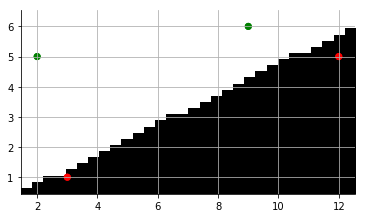

In [67]:
test_with_features(super_simple_separable_through_origin, order=1)

th [[ -5. -27.  44.]] th0 [[-5.]]
go?
Final score 4
Params [[ -5. -27.  44.]] [[-5.]]


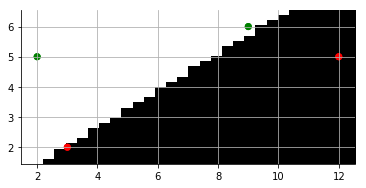

In [74]:
test_with_features(super_simple_separable,order=1)

th [[  1.  -1.  -1.  -5.  11.  -5.]] th0 [[ 1.]]
go?
Final score 4
Params [[  1.  -1.  -1.  -5.  11.  -5.]] [[ 1.]]


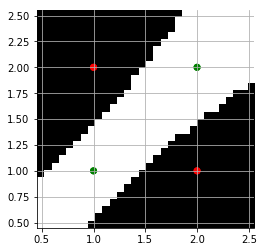

In [75]:
test_with_features(xor,order=2)

th [[ -78.   28.  -39.   72.  248.  -19.   76. -522.  476. -153.]] th0 [[-78.]]
go?
Final score 8
Params [[ -78.   28.  -39.   72.  248.  -19.   76. -522.  476. -153.]] [[-78.]]


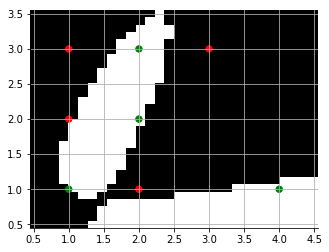

In [73]:
test_with_features(xor_more,order=3)

In [76]:
# Implement perceptron, average perceptron, and pegasos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pdb

######################################################################
# Plotting

def tidy_plot(xmin, xmax, ymin, ymax, center = False, title = None,
                 xlabel = None, ylabel = None):
    plt.ion()
    plt.figure(facecolor="white")
    ax = plt.subplot()
    if center:
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_color('none')
        ax.spines['left'].set_smart_bounds(True)
        ax.spines['bottom'].set_smart_bounds(True)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
    else:
        ax.spines["top"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.get_xaxis().tick_bottom()  
        ax.get_yaxis().tick_left()
    eps = .05
    plt.xlim(xmin-eps, xmax+eps)
    plt.ylim(ymin-eps, ymax+eps)
    if title: ax.set_title(title)
    if xlabel: ax.set_xlabel(xlabel)
    if ylabel: ax.set_ylabel(ylabel)
    return ax

# LPK: replace this with something that will work even for vertical lines
#  and goes all the way to the boundaries
# Also draw a little normal vector in the positive direction
def plot_separator(ax, th, th_0):
    xmin, xmax = ax.get_xlim()
    ymin,ymax = ax.get_ylim()
    pts = []
    eps = 1.0e-6
    # xmin boundary crossing is when xmin th[0] + y th[1] + th_0 = 0
    # that is, y = (-th_0 - xmin th[0]) / th[1]
    if abs(th[1,0]) > eps:
        pts += [np.array([x, (-th_0 - x * th[0,0]) / th[1,0]]) \
                                                        for x in (xmin, xmax)]
    if abs(th[0,0]) > 1.0e-6:
        pts += [np.array([(-th_0 - y * th[1,0]) / th[0,0], y]) \
                                                         for y in (ymin, ymax)]
    in_pts = []
    for p in pts:
        if (xmin-eps) <= p[0] <= (xmax+eps) and \
           (ymin-eps) <= p[1] <= (ymax+eps):
            duplicate = False
            for p1 in in_pts:
                if np.max(np.abs(p - p1)) < 1.0e-6:
                    duplicate = True
            if not duplicate:
                in_pts.append(p)
    if in_pts and len(in_pts) >= 2:
        # Plot separator
        vpts = np.vstack(in_pts)
        ax.plot(vpts[:,0], vpts[:,1], 'k-', lw=2)
        # Plot normal
        vmid = 0.5*(in_pts[0] + in_pts[1])
        scale = np.sum(th*th)**0.5
        diff = in_pts[0] - in_pts[1]
        dist = max(xmax-xmin, ymax-ymin)
        vnrm = vmid + (dist/10)*(th.T[0]/scale)
        vpts = np.vstack([vmid, vnrm])
        ax.plot(vpts[:,0], vpts[:,1], 'k-', lw=2)
        # Try to keep limits from moving around
        ax.set_xlim((xmin, xmax))
        ax.set_ylim((ymin, ymax))
    else:
        print('Separator not in plot range')

def plot_data(data, labels, ax = None, clear = False,
                  xmin = None, xmax = None, ymin = None, ymax = None):
    if ax is None:
        if xmin == None: xmin = np.min(data[0, :]) - 0.5
        if xmax == None: xmax = np.max(data[0, :]) + 0.5
        if ymin == None: ymin = np.min(data[1, :]) - 0.5
        if ymax == None: ymax = np.max(data[1, :]) + 0.5
        ax = tidy_plot(xmin, xmax, ymin, ymax)

        x_range = xmax - xmin; y_range = ymax - ymin
        if .1 < x_range / y_range < 10:
            ax.set_aspect('equal')
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
    elif clear:
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
        ax.clear()
    else:
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
    colors = np.choose(labels > 0, cv(['r', 'g']))[0]
    ax.scatter(data[0,:], data[1,:], c = colors,
                    marker = 'o', s=50, edgecolors = 'none')
    # Seems to occasionally mess up the limits
    ax.set_xlim(xlim); ax.set_ylim(ylim)
    ax.grid(True, which='both')
    #ax.axhline(y=0, color='k')
    #ax.axvline(x=0, color='k')
    return ax

######################################################################
#   Utilities

# Takes a list of numbers and returns a column vector:  n x 1
def cv(value_list):
    return np.transpose(rv(value_list))

# Takes a list of numbers and returns a row vector: 1 x n
def rv(value_list):
    return np.array([value_list])

# x is dimension d by n
# th is dimension d by m
# th0 is dimension 1 by m
# return matrix of y values for each column of x and theta: dimension m x n
def y(x, th, th0):
    return np.dot(np.transpose(th), x) + np.transpose(th0)

def length(d_by_m):
    return np.sum(d_by_m * d_by_m, axis = 0, keepdims = True)**0.5

# x is dimension d by n
# th is dimension d by m
# th0 is dimension 1 by m
# return matrix of signed dist for each column of x and theta: dimension m x n
def signed_dist(x, th, th0):
    # ugly transpose, unmotivated
    return y(x, th, th0) / np.transpose(length(th))

# x is dimension d by n
# th is dimension d by m
# th0 is dimension 1 by m
# return matrix of +1, 0, -1 for each column of x and theta:
#                                                dimension m x n
def positive(x, theta, theta_0):
    return np.sign(y(x, theta, theta_0))

def score(data, labels, th, th_0):
    return np.sum(positive(data, th, th_0) == labels, axis = 1, keepdims = True)

def score(data, labels, th, th_0):
    return np.sum(positive(data, th, th_0) == labels, axis = 1, keepdims = True)

######################################################################
#   Tests

def test_linear_classifier(dataFun, learner, learner_params = {},
                             draw = True, refresh = True, pause = True):
    data, labels = dataFun()
    d, n = data.shape
    if draw:
        ax = plot_data(data, labels)
        def hook(params):
            (th, th0) = params
            if refresh: plot_data(data, labels, ax, clear = True)
            plot_separator(ax, th, th0)
            print('th', th.T, 'th0', th0)
            if pause: input('go?')
    else:
        hook = None
    th, th0 = learner(data, labels, hook = hook, params = learner_params)
    print("Final score", float(score(data, labels, th, th0)) / n)
    print("Params", np.transpose(th), th0)
    
######################################################################
# For auto dataset

def load_auto_data(path_data):
    """
    Returns a list of dict with keys:
    """
    numeric_fields = {'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                      'acceleration', 'model_year', 'origin'}
    data = []
    with open(path_data) as f_data:
        for datum in csv.DictReader(f_data, delimiter='\t'):
            for field in list(datum.keys()):
                if field in numeric_fields and datum[field]:
                    datum[field] = float(datum[field])
            data.append(datum)
    return data

# Feature transformations
def std_vals(data, f):
    vals = [entry[f] for entry in data]
    avg = sum(vals)/len(vals)
    dev = [(entry[f] - avg)**2 for entry in data]
    sd = (sum(dev)/len(vals))**0.5
    return (avg, sd)

def standard(v, std):
    return [(v-std[0])/std[1]]

def raw(x):
    return [x]

def one_hot(v, entries):
    vec = len(entries)*[0]
    vec[entries.index(v)] = 1
    return vec

# The class (mpg) added to the front of features
def auto_data_and_labels(auto_data, features):
    features = [('mpg', raw)] + features
    std = {f:std_vals(auto_data, f) for (f, phi) in features if phi==standard}
    entries = {f:list(set([entry[f] for entry in auto_data])) \
               for (f, phi) in features if phi==one_hot}
    print('avg and std', std)
    print('entries in one_hot field', entries)
    vals = []
    for entry in auto_data:
        phis = []
        for (f, phi) in features:
            if phi == standard:
                phis.extend(phi(entry[f], std[f]))
            elif phi == one_hot:
                phis.extend(phi(entry[f], entries[f]))
            else:
                phis.extend(phi(entry[f]))
        vals.append(np.array([phis]))
    data_labels = np.vstack(vals)
    np.random.seed(0)
    np.random.shuffle(data_labels)
    return data_labels[:, 1:].T, data_labels[:, 0:1].T

######################################################################
# For food review dataset

from string import punctuation, digits, printable
import csv

def load_review_data(path_data):
    """
    Returns a list of dict with keys:
    * sentiment: +1 or -1 if the review was positive or negative, respectively
    * text: the text of the review
    """
    basic_fields = {'sentiment', 'text'}
    data = []
    with open(path_data) as f_data:
        for datum in csv.DictReader(f_data, delimiter='\t'):
            for field in list(datum.keys()):
                if field not in basic_fields:
                    del datum[field]
            if datum['sentiment']:
                datum['sentiment'] = int(datum['sentiment'])
            data.append(datum)
    return data

printable = set(printable)
def clean(s):
    return filter(lambda x: x in printable, s)

def extract_words(input_string):
    """
    Helper function for bag_of_words()
    Inputs a text string
    Returns a list of lowercase words in the string.
    Punctuation and digits are separated out into their own words.
    """
    for c in punctuation + digits:
        input_string = input_string.replace(c, ' ' + c + ' ')

    # return [ps.stem(w) for w in input_string.lower().split()]
    return input_string.lower().split()

def bag_of_words(texts):
    """
    Inputs a list of string reviews
    Returns a dictionary of unique unigrams occurring over the input

    Feel free to change this code as guided by Section 3 (e.g. remove stopwords, add bigrams etc.)
    """
    dictionary = {} # maps word to unique index
    for text in texts:
        word_list = extract_words(text)
        for word in word_list:
            if word not in dictionary:
                dictionary[word] = len(dictionary)
    return dictionary

def extract_bow_feature_vectors(reviews, dictionary):
    """
    Inputs a list of string reviews
    Inputs the dictionary of words as given by bag_of_words
    Returns the bag-of-words feature matrix representation of the data.
    The returned matrix is of shape (n, m), where n is the number of reviews
    and m the total number of entries in the dictionary.
    """

    num_reviews = len(reviews)
    feature_matrix = np.zeros([num_reviews, len(dictionary)])

    for i, text in enumerate(reviews):
        word_list = extract_words(text)
        for word in word_list:
            if word in dictionary:
                feature_matrix[i, dictionary[word]] = 1
    # We want the feature vectors as columns
    return feature_matrix.T

print('code for lab2 loaded')
    

code for lab2 loaded


In [81]:
import pdb
import numpy as np
import code_for_lab2 as l2

#-------------------------------------------------------------------------------
# Auto Data
#-------------------------------------------------------------------------------

# Returns a list of dictionaries.  Keys are the column names, including mpg.
auto_data_all = l2.load_auto_data('auto-mpg.tsv')

# The choice of feature processing for each feature, mpg is always raw and
# does not need to be specified.  Other choices are l2.standard and l2.one_hot.
# 'name' is not numeric and would need a different encoding.
features = [('cylinders', l2.raw),
            ('displacement', l2.raw),
            ('horsepower', l2.raw),
            ('weight', l2.raw),
            ('acceleration', l2.raw),
            ('model_year', l2.raw),
            ('origin', l2.raw)]

# Construct the standard data and label arrays
auto_data, auto_labels = l2.auto_data_and_labels(auto_data_all, features)
print('auto data and labels shape', auto_data.shape, auto_labels.shape)

#-------------------------------------------------------------------------------
# Analyze auto data
#-------------------------------------------------------------------------------

# Your code here to process the auto data

#-------------------------------------------------------------------------------
# Review Data
#-------------------------------------------------------------------------------

# Returns lists of dictionaries.  Keys are the column names, 'sentiment' and 'text'.
# The train data has 10,000 examples
review_data = l2.load_review_data('reviews.tsv')
submit_data = l2.load_review_data('reviews_submit.tsv')

# Lists texts of reviews and list of labels (1 or -1)
review_texts, review_label_list = zip(*((sample['text'], sample['sentiment']) for sample in review_data))
submit_texts = [sample['text'] for sample in submit_data]

# The dictionary of all the words for "bag of words"
dictionary = l2.bag_of_words(review_texts)

# The standard data arrays for the bag of words
review_bow_data = l2.extract_bow_feature_vectors(review_texts, dictionary)
review_labels = l2.rv(review_label_list)
print('review_bow_data and labels shape', review_bow_data.shape, review_labels.shape)
# We don't have labels for submit data set
submit_bow_data = l2.extract_bow_feature_vectors(submit_texts, dictionary)

#-------------------------------------------------------------------------------
# Analyze review data
#-------------------------------------------------------------------------------

# Your code here to process the review data

ModuleNotFoundError: No module named 'code_for_lab2'

In [77]:
import numpy as np

def xval_learning_alg(learner, data, labels, k):
    ave=0
    D_k=int(data.shape[1]/k)
    print(data.shape[1],k,D_k)
    for j in range(k-1):
        data_train=np.delete(data,np.s_[j*D_k:(j+1)*D_k],axis=1)
        labels_train=np.delete(labels,np.s_[j*D_k:(j+1)*D_k],axis=1)
        data_test=data[:,j*D_k:(j+1)*D_k]
        labels_test=labels[:,j*D_k:(j+1)*D_k]
        (th,th0)=learner(data_train,labels_train)
        ave=ave+eval_classifier(learner,data_train, labels_train, data_test, labels_test)
    data_train=data[:,:(k-1)*D_k]
    labels_train=labels[:,:(k-1)*D_k]
    data_test=data[:,(k-1)*D_k:]
    labels_test=labels[:,(k-1)*D_k:]
    (th,th0)=learner(data_train,labels_train)
    ave=ave+eval_classifier(learner,data_train, labels_train, data_test, labels_test)
    return(ave/k)
    pass


In [78]:
import numpy as np

def averaged_perceptron(data, labels, params={}, hook=None):
    # if T not in params, default to 100
    T = params.get('T', 100)

    # Your implementation here
    th=data[:,0]*labels[:,0]
    th0=labels[:,0]
    ths=data[:,0]*labels[:,0]
    th0s=labels[:,0]
    c=1
    for t in range(T):
        for i in range(labels.shape[1]):
            if (labels[:,i]*(np.dot(np.transpose(data[:,i]),th)+th0))<=0:
                th=th+data[:,i]*labels[:,i]
                th0=th0+labels[:,i]
                ths=ths+c*data[:,i]*labels[:,i]
                th0s=th0s+c*labels[:,i]
            c=c-1/(T*labels.shape[1])

    return ([np.expand_dims(ths,axis=1), np.expand_dims(th0s,axis=1).astype(float)])

In [79]:
import numpy as np

def perceptron(data, labels, params={}, hook=None):
    # if T not in params, default to 100
    T = params.get('T', 100)
    th=data[:,0]*labels[:,0]
    th0=labels[:,0]
    for t in range(T):
        for i in range(labels.shape[1]):
            if (labels[:,i]*(np.dot(np.transpose(data[:,i]),th)+th0))<=0:
                th=th+data[:,i]*labels[:,i]
                th0=th0+labels[:,i]

    
    return ([np.expand_dims(th,axis=1).astype(float), np.expand_dims(th0,axis=1).astype(float)])

    # Your implementation here



In [ ]:

xval_learning_alg(perceptron,)